
Your estimated yearly carbon footprint is: 24261.12 kg CO2
Want to reduce your carbon footprint? Here are some changes you can make:

1. Reduce meat by 1 day per week — saves approx. 150 kg CO₂/year
2. Use public transportation or carpool once a week — saves approx. 500 kg CO₂/year
3. Switch to renewable energy — saves approx. 1200 kg CO₂/year
4. Unplug electronics when not in use — saves approx. 300 kg CO₂/year
5. Buy second-hand instead of new clothes — saves approx. 200 kg CO₂/year
6. Compost food waste — saves approx. 250 kg CO₂/year
7. Recycle regularly — saves approx. 180 kg CO₂/year
8. Use reusable products instead of plastic — saves approx. 100 kg CO₂/year

 Based on your choices, your new estimated carbon footprint is: 22411.12 kg CO₂/year
You reduced your footprint by 1850.00 kg CO₂! 


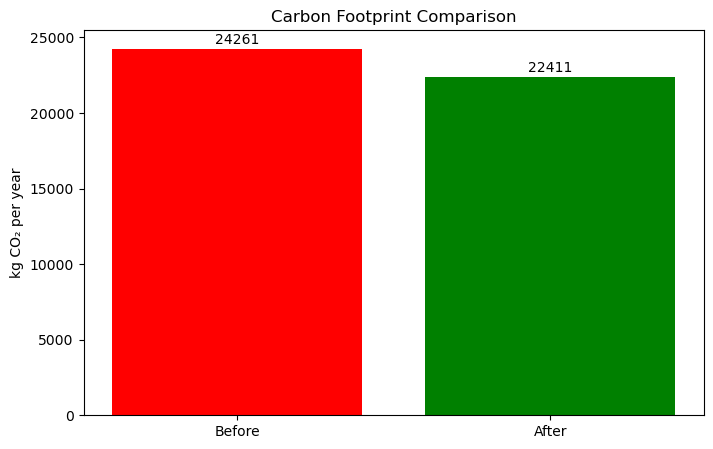

In [2]:
# Ask Quesstions Travel
vehicle = input("What kind of vehicle do you typically use?(e.g Car, Suv, Truck):" ).strip().lower()
mpg = int(input("How many miles do you typically travel per week?"))

# Ask Questions Electricity
renewable = input("Is the electricity in your home renewable?(e.g Yes, No ,Some):")
lights = input("Do you often leave lights, TVs, or electronics on when not in use? e.g Often, Sometimes, Not Often):")
kwh = int(input("How many kilowatt-hours (kWh) of electricity does your home use per week? (Enter 900 if unsure): "))

# Ask Questions Diet
meat_per_week = input("How many times a week do you eat meat?")
locally_grown = input("How often do you eat locally grown food? e.g Often, Sometimes, Not Often :")
save_food = input("How often do you throw away food? e.g Often, Sometimes, Not often :")


# Ask Questions Shopping
quanity = input('How often do you purchase new clothes/shoes/accessories?(Every Week, Every Month, Every Few Months, Every Year)')
thrift = input("How Likely are you to Thrift Shop/Wear Second Hand Clothing?(e.g Often, Sometimes, Never):")

# Ask Questions Waste
plastic = input("How often do you use nonreusable plastic products? Ex: forks, plates, cups e.g Often, Sometimes, Not Often:")
recycle = input("How many times a week do you recycle?")
compost = input("Do you compost? e.g. Yes, Sometimes, No:")




# Emission Caluculations 

# Step 2: Emissions Calculation Functions

def travel_emissions(miles, mpg):
    return (miles / mpg) * 8.89

def electricity_emissions(kwh, renewable):
    emission_rate = 0.4 if renewable.lower() == "yes" else 0.92
    return kwh * emission_rate

def diet_emissions(meat_times):
    return int(meat_times) * 2.5 * 4

def shopping_emissions(quantity):
    levels = {
        "every week": 20,
        "every month": 15,
        "every few months": 10,
        "every year": 5
    }
    return levels.get(quantity.lower(), 10)

def waste_emissions(plastic, recycle, compost):
    plastic_score = {"often": 20, "sometimes": 10, "not often": 5}
    compost_score = {"yes": -5, "no": 0}
    recycle_score = int(recycle) * -1
    return plastic_score.get(plastic.lower(), 10) + compost_score.get(compost.lower(), 0) + recycle_score

# Step 3: Calculate Total Carbon Footprint

# Convert miles from MPG and miles driven
miles = mpg * 4  # Convert to monthly miles

# Call functions using input values
total = (
    travel_emissions(miles, mpg) +
    electricity_emissions(kwh, renewable) +
    diet_emissions(meat_per_week) +
    shopping_emissions(quanity) +
    waste_emissions(plastic, recycle, compost)) * 52


   
# Reduction tips and savings (in kg CO2 per year)
reduction_options = {
    "1": ("Reduce meat by 1 day per week", 150),
    "2": ("Use public transportation or carpool once a week", 500),
    "3": ("Switch to renewable energy", 1200),
    "4": ("Unplug electronics when not in use", 300),
    "5": ("Buy second-hand instead of new clothes", 200),
    "6": ("Compost food waste", 250),
    "7": ("Recycle regularly", 180),
    "8": ("Use reusable products instead of plastic", 100)
}


# Output the result
print(f"\nYour estimated yearly carbon footprint is: {total:.2f} kg CO2")

# Show reduction options
print("="*50)
print("Want to reduce your carbon footprint? Here are some changes you can make:\n")

for key, (tip, savings) in reduction_options.items():
    print(f"{key}. {tip} — saves approx. {savings} kg CO₂/year")

print("="*50)

# Ask the user to choose which ones they'll try
choices = input("\nType the numbers of the changes you'll commit to (e.g. 1,3,6): ").split(",")



# Calculate total savings
savings = 0
for choice in choices:
    choice = choice.strip()
    if choice in reduction_options:
        savings += reduction_options[choice][1]

# Recalculate and print new total
new_total = total - savings

print(f"\n Based on your choices, your new estimated carbon footprint is: {new_total:.2f} kg CO₂/year")
print(f"You reduced your footprint by {savings:.2f} kg CO₂! ")

# Plot Comparison

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
bars = plt.bar(["Before", "After"], [total, new_total], color=["red", "green"])
plt.title("Carbon Footprint Comparison")
plt.ylabel("kg CO₂ per year")

# Label each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 100, f"{yval:.0f}", ha='center', va='bottom')

plt.show()

